# Pass@k curves

In [61]:
from pathlib import Path
paths_to_results = [  # baselines (if compare)
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.6.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.7.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.8.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.9.json.gz",
    "../../../results/temperature_experiment/lcb_sc2_15b_generator_temp1.0.json.gz",
]
labels = [
    "Temperature 0.6",
    "Temperature 0.7",
    "Temperature 0.8",
    "Temperature 0.9",
    "Temperature 1.0",
]
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [62]:
from coderm.eval.metrics import get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np

all_pass_ks = {}
for l, r in zip(labels, paths_to_results):
    print(f"Reading", r)
    items = gunzip_json_read(r)["items"]
    upper_k = len(items[0]["results"])
    pass_ks = {}
    for k in range(1, upper_k+1):
        pass_ks[k] = np.mean(get_pass_ks(items, k)) * 100
    all_pass_ks[l] = pass_ks

Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.6.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.7.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.8.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp0.9.json.gz
Reading ../../../results/temperature_experiment/lcb_sc2_15b_generator_temp1.0.json.gz


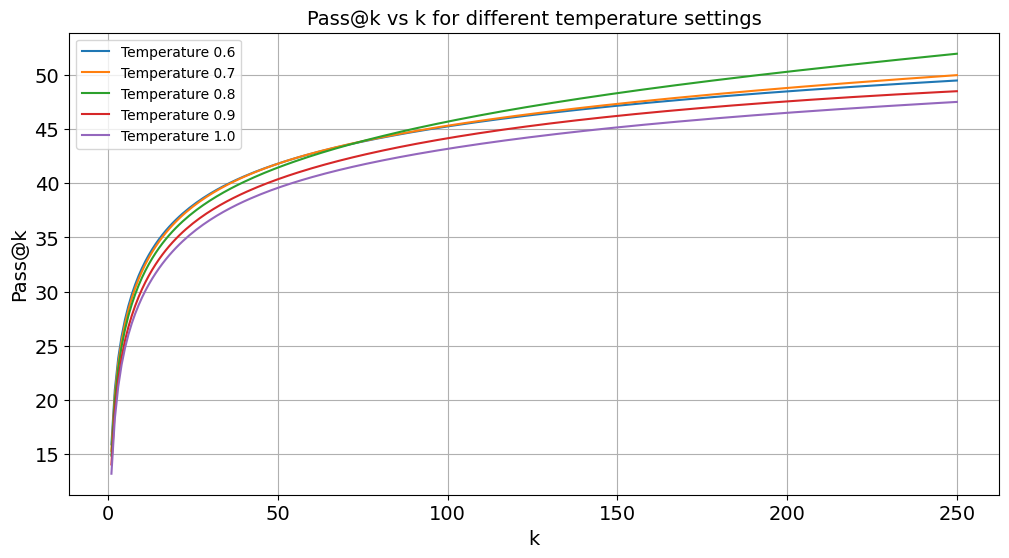

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for label, values in all_pass_ks.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--' if any(p in label for p in paths_to_results) and len(compare) > 0 else '-'
    plt.plot(ks, pass_at_k, label=label, linestyle=linestyle)

plt.xlabel('k', fontsize=14)
plt.ylabel('Pass@k', fontsize=14)
plt.title('Pass@k vs k for different temperature settings', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("../../dataset/plots/temp_experiment.pdf")
plt.show()

In [143]:
paths_to_results = [
    "../../../results/temp_generator/lcb_generator_llama3_70b_temp08.json.gz",
    "../../../results/temp_generator/lcb_generator_sc2_15b_temp08.json.gz",
    "../../../results/temp_cot_generator/lcb_generator_sc2_15b_cot_temp08.json.gz",
    "../../../results/temp_finetunes/lcb_sc2_taco_15b_temp08.json.gz",
    "../../../results/temp_generator/lcb_generator_sc2_7b_temp08.json.gz",
    "../../../results/temp_cot_generator/lcb_generator_sc2_7b_cot_temp08.json.gz",
    "../../../results/temp_finetunes/lcb_sc2_taco_7b_temp08.json.gz",
    "../../../results/temp_generator/lcb_generator_sc2_3b_temp08.json.gz",
    "../../../results/temp_cot_generator/lcb_generator_sc2_3b_cot_temp08.json.gz",
    "../../../results/temp_finetunes/lcb_sc2_taco_3b_temp08.json.gz",
]
labels = [
    "Reasoning-augmented 70B",
    "Reasoning-augmented 15B",
    "CoT 15B",
    "None 15B",
    "Reasoning-augmented 7B",
    "CoT 7B",
    "None 7B",
    "Reasoning-augmented 3B",
    "CoT 3B",
    "None 3B",
]
colors = [
    "purple",
    "red",
    "red",
    "red",
    "green",
    "green",
    "green",
    "blue",
    "blue",
    "blue",
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [144]:
from coderm.eval.metrics import get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np

all_pass_ks = {}
for c, l, r in zip(colors, labels, paths_to_results):
    print(f"Reading", r)
    items = gunzip_json_read(r)["items"]
    upper_k = len(items[0]["results"])
    pass_ks = {}
    for k in range(1, upper_k+1):
        pass_ks[k] = np.mean(get_pass_ks(items, k)) * 100
    all_pass_ks[(c, l)] = pass_ks


Reading ../../../results/temp_generator/lcb_generator_llama3_70b_temp08.json.gz
Reading ../../../results/temp_generator/lcb_generator_sc2_15b_temp08.json.gz
Reading ../../../results/temp_cot_generator/lcb_generator_sc2_15b_cot_temp08.json.gz
Reading ../../../results/temp_finetunes/lcb_sc2_taco_15b_temp08.json.gz
Reading ../../../results/temp_generator/lcb_generator_sc2_7b_temp08.json.gz
Reading ../../../results/temp_cot_generator/lcb_generator_sc2_7b_cot_temp08.json.gz
Reading ../../../results/temp_finetunes/lcb_sc2_taco_7b_temp08.json.gz
Reading ../../../results/temp_generator/lcb_generator_sc2_3b_temp08.json.gz
Reading ../../../results/temp_cot_generator/lcb_generator_sc2_3b_cot_temp08.json.gz
Reading ../../../results/temp_finetunes/lcb_sc2_taco_3b_temp08.json.gz


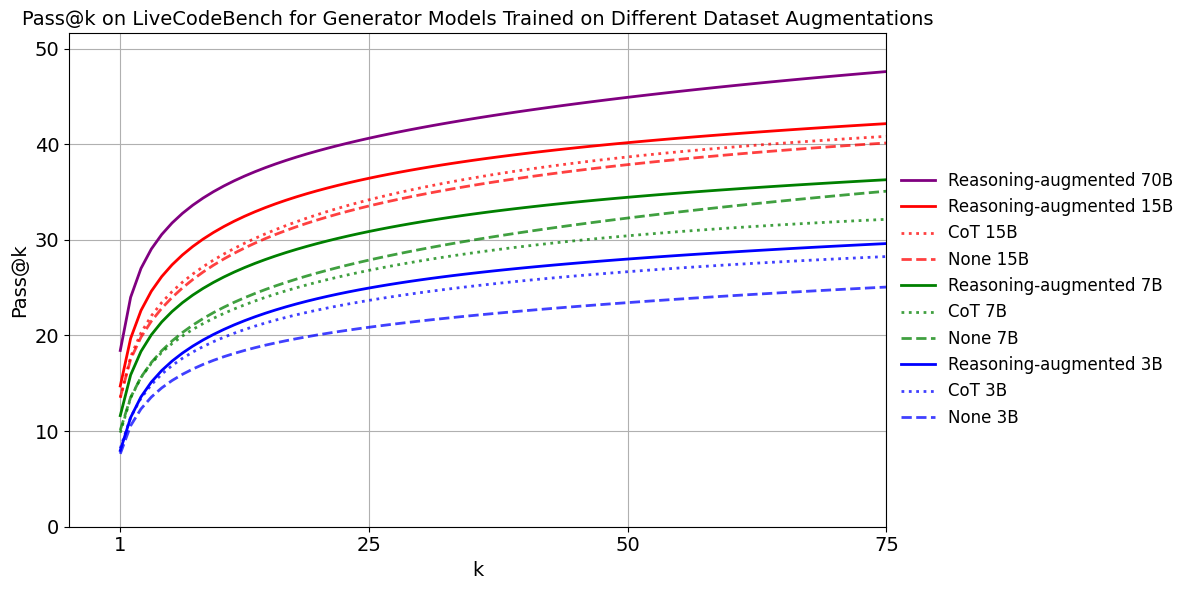

In [172]:
import matplotlib.pyplot as plt
from pathlib import Path
plt.figure(figsize=(12, 6))
for (color, label), values in all_pass_ks.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    if "None" in label:
        linestyle = "dashed"
        alpha = 0.75
    elif "Reasoning-augmented" in label:
        linestyle = "solid"
        alpha = 1.0
    elif "CoT" in label:
        linestyle = "dotted"
        alpha = 0.75
    else:
        raise ValueError("unknown style in label: " + label)
    plt.plot(ks, pass_at_k, label=label, linestyle=linestyle, color=color, alpha=alpha, linewidth=2)

plt.xlabel('k', fontsize=14)
plt.ylabel('Pass@k', fontsize=14)
plt.title('Pass@k on LiveCodeBench for Generator Models Trained on Different Dataset Augmentations', fontsize=14)
plt.legend(fontsize=12, bbox_to_anchor=(1.0, 0.75), loc='upper left', frameon=False)
plt.grid(True)
plt.xlim(right=75)
plt.ylim(bottom=0)
plt.xticks([1, 25, 50, 75])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.savefig("../../dataset/plots/diversity_generation.pdf", bbox_inches='tight')
plt.show()

# ORM Pass@{1, n} on LCB

In [68]:
paths_to_results = [
    "../../../results/orm_results/lcb_generator_llama3_70b_temp08_orm_70b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_7b.json.gz",
    "../../../results/orm_results/lcb_generator_sc2_3b_temp08_orm_3b.json.gz",
]
labels = [
    "Reasoner-70B + RM-70B",
    "Reasoner-15B + RM-15B",
    "Reasoner-7B + RM-7B",
    "Reasoner-3B + RM-3B",
]
normalize = [
    True,
    False,
    False,
    False,
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [69]:
from coderm.eval.metrics import get_orm_acc
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm

perms=50 # number of permutations to reduce variance

lcb_orm_accs = {}
for prod, l, r in zip(normalize, labels, paths_to_results):
    if prod:
        prod = "normalized"
    else:
        prod = None
    print(f"Reading", r, " --- ", l)
    items = gunzip_json_read(r)["items"]
    upper_n = len(items[0]["results"])
    orm_accs = {}
    for n in tqdm(list(range(1, upper_n+1))):
        res = get_orm_acc(items, n=n, perms=perms, prod=prod)
        accs = res[0]
        stds = res[2]
        acc = np.mean(accs) * 100
        std = np.mean(stds) * 100
        orm_accs[n] = (acc, std)
    lcb_orm_accs[l] = orm_accs

Reading ../../../results/orm_results/lcb_generator_llama3_70b_temp08_orm_70b.json.gz  ---  Reasoner-70B + RM-70B


100%|██████████| 100/100 [00:58<00:00,  1.71it/s]


Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz  ---  Reasoner-15B + RM-15B


100%|██████████| 100/100 [00:26<00:00,  3.75it/s]


Reading ../../../results/orm_results/lcb_generator_sc2_7b_temp08_orm_7b.json.gz  ---  Reasoner-7B + RM-7B


100%|██████████| 100/100 [00:24<00:00,  4.09it/s]


Reading ../../../results/orm_results/lcb_generator_sc2_3b_temp08_orm_3b.json.gz  ---  Reasoner-3B + RM-3B


100%|██████████| 100/100 [00:24<00:00,  4.03it/s]


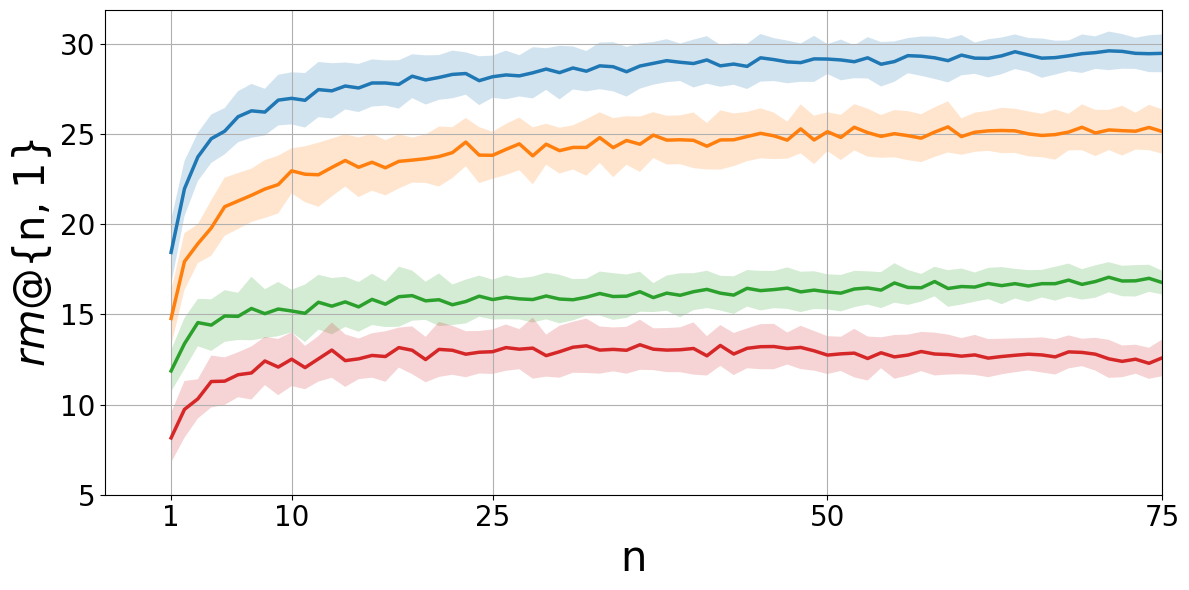

In [163]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

for label, values in lcb_orm_accs.items():
    ks = list(values.keys())
    means, stds = zip(*values.values())
    means = np.array(means)
    stds = np.array(stds)
    linestyle = '-'
    ax.plot(ks, means, label=label, linestyle=linestyle, linewidth=2.5)  # Increased linewidth
    ax.fill_between(ks, means - stds, means + stds, alpha=0.2)

ax.set_xlabel('n', fontsize=30)
ax.set_ylabel('$rm@${n, 1}', fontsize=30)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim(bottom=5)
ax.set_xlim(right=75)
ax.set_xticks([1, 10, 25, 50, 75])

plt.tight_layout() 
plt.savefig("../../dataset/plots/rm_curve.pdf", bbox_inches='tight')
plt.show()
plt.close(fig)

# create a separate legend figure
legend_fig, legend_ax = plt.subplots(figsize=(5, 3))
legend_ax.axis('off')
handles, labels = ax.get_legend_handles_labels()
legend = legend_ax.legend(handles, labels, loc='center', fontsize=20, frameon=False)
legend_fig.savefig("../../dataset/plots/rm_curve_legend.pdf", bbox_inches='tight')
plt.close(legend_fig)

# ORM Pass@{1, n} on HumanEval+

In [71]:
paths_to_results = [
    "../../../results/orm_results/humaneval_generator_llama3_70b_temp08_orm_70b.json.gz",
    "../../../results/orm_results/humaneval_generator_sc2_15b_temp08_orm_15b.json.gz",
    "../../../results/orm_results/humaneval_generator_sc2_7b_temp08_orm_7b.json.gz",
    "../../../results/orm_results/humaneval_generator_sc2_3b_temp08_orm_3b.json.gz",
]
labels = [
    "Reasoner-70B + RM-70B",
    "Reasoner-15B + RM-15B",
    "Reasoner-7B + RM-7B",
    "Reasoner-3B + RM-3B",
]
normalize = [
    True,
    False,
    False,
    False,
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [72]:
from coderm.eval.metrics import get_orm_acc
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm

perms=50 # number of permutations to reduce variance

he_orm_accs = {}
for prod, l, r in zip(normalize, labels, paths_to_results):
    if prod:
        prod = "normalized"
    else:
        prod = None
    print(f"Reading", r, " --- ", l)
    items = gunzip_json_read(r)["items"]
    upper_n = len(items[0]["results"])
    orm_accs = {}
    for n in tqdm(list(range(1, upper_n+1))):
        res = get_orm_acc(items, n=n, perms=perms, prod=prod)
        accs = res[0]
        stds = res[2]
        acc = np.mean(accs) * 100
        std = np.mean(stds) * 100
        orm_accs[n] = (acc, std)
    he_orm_accs[l] = orm_accs

Reading ../../../results/orm_results/humaneval_generator_llama3_70b_temp08_orm_70b.json.gz  ---  Reasoner-70B + RM-70B


100%|██████████| 100/100 [00:47<00:00,  2.12it/s]


Reading ../../../results/orm_results/humaneval_generator_sc2_15b_temp08_orm_15b.json.gz  ---  Reasoner-15B + RM-15B


100%|██████████| 100/100 [00:18<00:00,  5.29it/s]


Reading ../../../results/orm_results/humaneval_generator_sc2_7b_temp08_orm_7b.json.gz  ---  Reasoner-7B + RM-7B


100%|██████████| 100/100 [00:18<00:00,  5.44it/s]


Reading ../../../results/orm_results/humaneval_generator_sc2_3b_temp08_orm_3b.json.gz  ---  Reasoner-3B + RM-3B


100%|██████████| 100/100 [00:18<00:00,  5.35it/s]


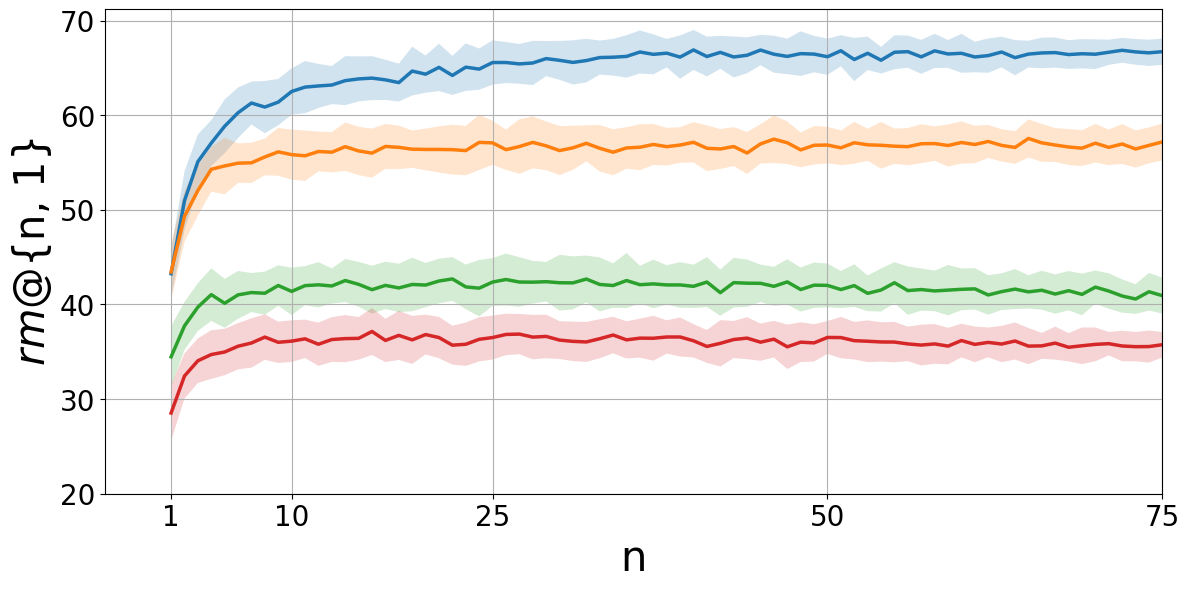

In [167]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

for label, values in he_orm_accs.items():
    ks = list(values.keys())
    means, stds = zip(*values.values())
    means = np.array(means)
    stds = np.array(stds)
    linestyle = '-'
    ax.plot(ks, means, label=label, linestyle=linestyle, linewidth=2.5)  # Increased linewidth
    ax.fill_between(ks, means - stds, means + stds, alpha=0.2)

ax.set_xlabel('n', fontsize=30)
ax.set_ylabel('$rm@${n, 1}', fontsize=30)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim(bottom=20)
ax.set_xlim(right=75)
ax.set_xticks([1, 10, 25, 50, 75])

plt.tight_layout() 
plt.savefig("../../dataset/plots/rm_curve_he.pdf", bbox_inches='tight')
plt.show()
plt.close(fig)

# ORM Pass@{1, n} on USACOBench

In [123]:
paths_to_results = [ # TODO: run results
    "../../../results/orm_results/usacobench_generator_llama3_70b_temp08_orm_70b.json.gz",
    "../../../results/orm_results/usacobench_generator_sc2_15b_temp08_orm_15b.json.gz",
    "../../../results/orm_results/usacobench_generator_sc2_7b_temp08_orm_7b.json.gz",
    "../../../results/orm_results/usacobench_generator_sc2_3b_temp08_orm_3b.json.gz",
]
labels = [
    "Reasoner-70B + RM-70B",
    "Reasoner-15B + RM-15B",
    "Reasoner-7B + RM-7B",
    "Reasoner-3B + RM-3B",
]
normalize = [
    True,
    False,
    False,
    False,
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [124]:
from coderm.eval.metrics import get_orm_acc
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm

perms=50 # number of permutations to reduce variance

ub_orm_accs = {}
for prod, l, r in zip(normalize, labels, paths_to_results):
    if prod:
        prod = "normalized"
    else:
        prod = None
    print(f"Reading", r, " --- ", l)
    items = gunzip_json_read(r)["items"]
    upper_n = len(items[0]["results"])
    orm_accs = {}
    for n in tqdm(list(range(1, upper_n+1))):
        res = get_orm_acc(items, n=n, perms=perms, prod=prod)
        accs = res[0]
        stds = res[2]
        acc = np.mean(accs) * 100
        std = np.mean(stds) * 100
        orm_accs[n] = (acc, std)
    ub_orm_accs[l] = orm_accs

Reading ../../../results/orm_results/usacobench_generator_llama3_70b_temp08_orm_70b.json.gz  ---  Reasoner-70B + RM-70B


100%|██████████| 100/100 [02:25<00:00,  1.46s/it]


Reading ../../../results/orm_results/usacobench_generator_sc2_15b_temp08_orm_15b.json.gz  ---  Reasoner-15B + RM-15B


100%|██████████| 100/100 [01:01<00:00,  1.62it/s]


Reading ../../../results/orm_results/usacobench_generator_sc2_7b_temp08_orm_7b.json.gz  ---  Reasoner-7B + RM-7B


100%|██████████| 100/100 [00:59<00:00,  1.68it/s]


Reading ../../../results/orm_results/usacobench_generator_sc2_3b_temp08_orm_3b.json.gz  ---  Reasoner-3B + RM-3B


100%|██████████| 100/100 [01:00<00:00,  1.65it/s]


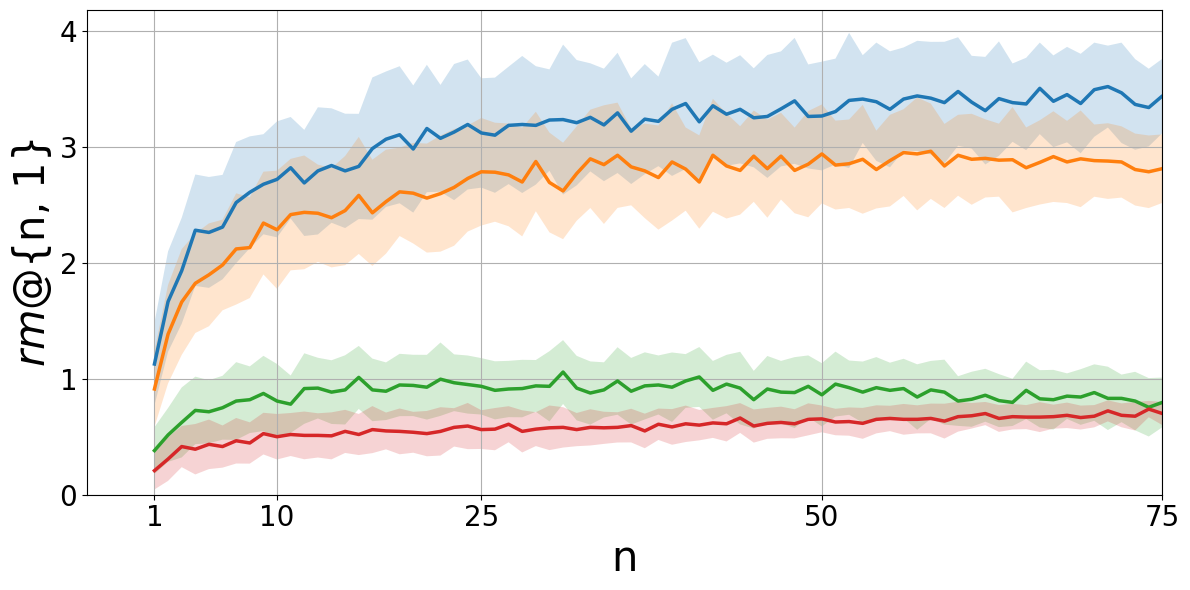

In [170]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

for label, values in ub_orm_accs.items():
    ks = list(values.keys())
    means, stds = zip(*values.values())
    means = np.array(means)
    stds = np.array(stds)
    linestyle = '-'
    ax.plot(ks, means, label=label, linestyle=linestyle, linewidth=2.5)  # Increased linewidth
    ax.fill_between(ks, means - stds, means + stds, alpha=0.2)

ax.set_xlabel('n', fontsize=30)
ax.set_ylabel('$rm@${n, 1}', fontsize=30)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim(bottom=0)
ax.set_xlim(right=75)
ax.set_xticks([1, 10, 25, 50, 75])

plt.tight_layout() 
plt.savefig("../../dataset/plots/rm_curve_ub.pdf", bbox_inches='tight')
plt.show()
plt.close(fig)

# ORM Pass@{k, 100} vs Pass@k

In [74]:
paths_to_results = [
    "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz",
]
labels = [
    "Reasoner-15B",
]
from pathlib import Path
for p in paths_to_results:
    assert Path(p).exists(), f"Path {p} doesn't exist!"

In [75]:
from coderm.eval.metrics import get_orm_acc, get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm

all_orm_accs = {}
all_passk_accs = {}
for l, r in zip(labels, paths_to_results):
    print(f"Reading", r, " --- ", l)
    items = gunzip_json_read(r)["items"]
    upper_n = len(items[0]["results"])
    orm_accs = {}
    passk_accs = {}
    for k in tqdm(list(range(1, upper_n+1))):
        orm_accs[k] = np.mean(get_orm_acc(items, n=upper_n, k=k)[0]) * 100
        passk_accs[k] = np.mean(get_pass_ks(items, k=k)) * 100
    all_orm_accs[l] = orm_accs
    all_passk_accs[l] = passk_accs

Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz  ---  Reasoner-15B


100%|██████████| 100/100 [00:26<00:00,  3.81it/s]


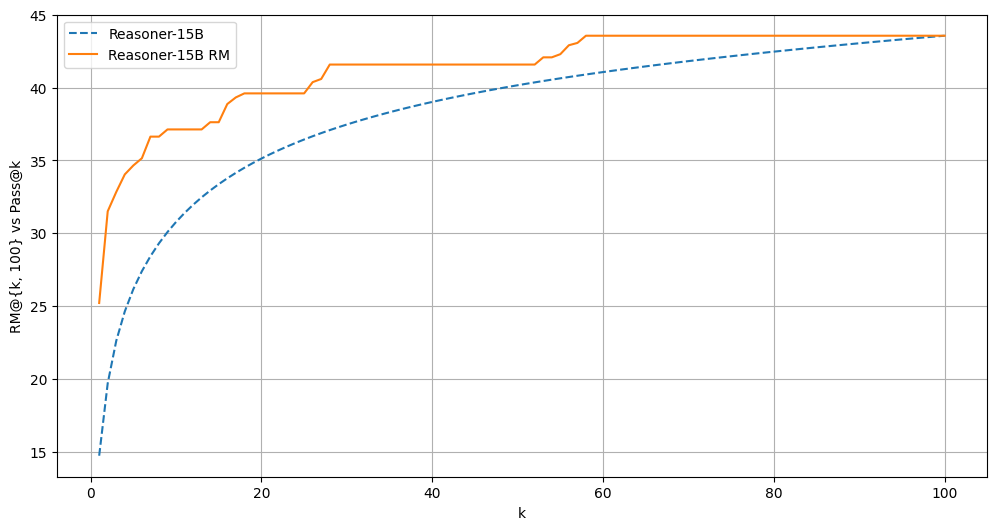

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

for label, values in all_passk_accs.items():
    ks = list(values.keys())
    pass_at_k = list(values.values())
    linestyle = '--'
    plt.plot(ks, pass_at_k, label=label, linestyle=linestyle)

for label, values in all_orm_accs.items():
    ks = list(values.keys())
    orm_acc = list(values.values())
    linestyle = '-'
    plt.plot(ks, orm_acc, label=label + " RM", linestyle=linestyle)


plt.xlabel('k')
plt.ylabel('RM@{k, 100} vs Pass@k')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
def compute_orm_accuracy(params):
    items, k, n, perms = params
    orm_acc = np.mean(get_orm_acc(items, n=n, k=k, perms=perms)[0])
    return k, n, orm_acc

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from coderm.eval.metrics import get_orm_acc
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm
import matplotlib.colors as mcolors
from pathlib import Path
from multiprocess import Pool
import os

chunksize = 256

p = "../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz"
assert Path(p).exists(), f"Path {p} doesn't exist!"

print(f"Reading", p)
items = gunzip_json_read(p)["items"]
upper_n = len(items[0]["results"]) 
upper_n = 100
orm_accs = {}

params_list = [(items, k, n, 10) for k in range(1, upper_n+1) for n in range(1, upper_n+1)]

with Pool(processes=os.cpu_count()) as pool: 
    results = list(tqdm(pool.imap(compute_orm_accuracy, params_list, chunksize=chunksize), total=len(params_list)))
    
for k, n, acc in results:
    orm_accs[(k, n)] = acc

Reading ../../../results/orm_results/lcb_generator_sc2_15b_temp08_orm_15b.json.gz


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:48<00:00, 206.58it/s]


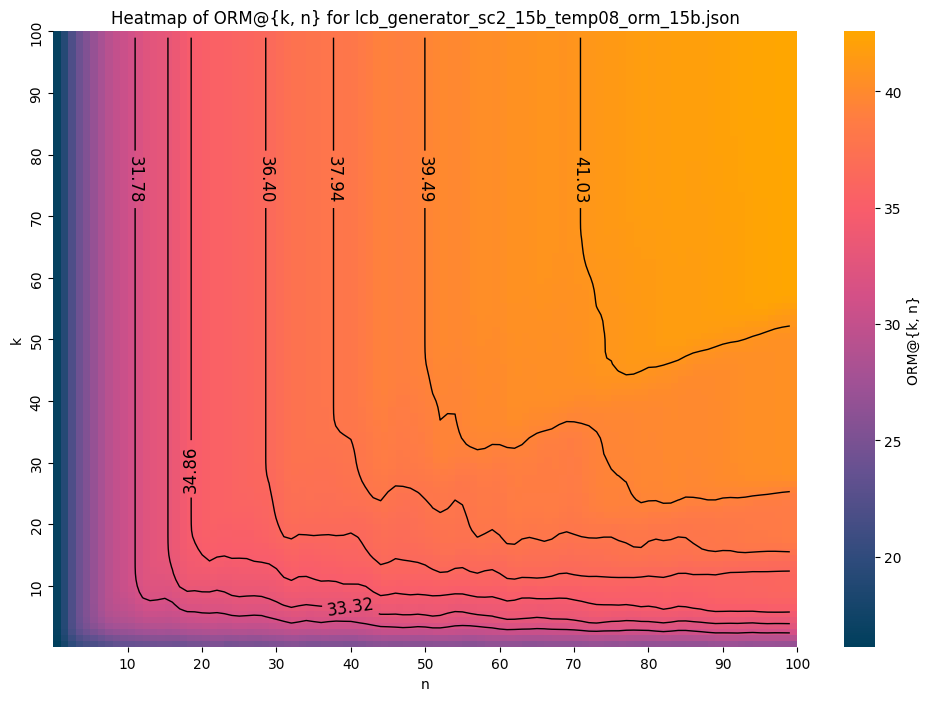

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.colors as mcolors
from pathlib import Path

# Define the custom color map
colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Assuming 'orm_accs' is a dictionary with (k, n) keys and accuracy values scaled by 100
data = []
ks = []
ns = []
for (k, n), acc in orm_accs.items():
    ks.append(k)
    ns.append(n)
    data.append(acc * 100)  # Multiply by 100 to scale the accuracy percentage
df = pd.DataFrame({'k': ks, 'n': ns, 'Accuracy': data})
pivot_table = df.pivot(index="k", columns="n", values="Accuracy")

# Apply Gaussian smoothing
smoothed_data = gaussian_filter(pivot_table, sigma=1)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(smoothed_data, cmap=cmap, cbar_kws={'label': 'ORM@{k, n}'})
contours = plt.contour(smoothed_data, levels=np.linspace(np.percentile(smoothed_data, 15), smoothed_data.max(), 8), colors='black', linewidths=1.0)
plt.clabel(contours, inline=True, fontsize=12)
plt.title(f'Heatmap of ORM@{{k, n}} for {Path(p).stem}')

# Adjust tick marks to start from zero and step by 10
xtick_marks = np.arange(0, pivot_table.shape[1] + 1, 10)[1:]
ytick_marks = np.arange(0, pivot_table.shape[0] + 1, 10)[1:]
plt.xticks(xtick_marks, xtick_marks, rotation=0.5)
plt.yticks(ytick_marks, ytick_marks)

# Invert y-axis to have the lowest index at the bottom and increase upwards
ax.invert_yaxis()

plt.xlabel('n')
plt.ylabel('k')
plt.show()

# RL Pass@1 over time vs SFT Pass@1

In [12]:
dirs = [
    "../../../results/rl_results/offlinedpo_scored_15b_runs/",
    "../../../results/rl_results/offlinedpo_exec_15b_runs/",
    "../../../results/rl_results/offlinedpo_scored_15b_random_runs/",
    "../../../results/greedy_generator/sc2_15b_checkpoints/",
]
labels = [
    "DPO + RM-15B",
    "DPO + Tests",
    "DPO + Random",
    "SFT",
]
step_0s = [
    "../../../results/greedy_generator/lcb_generator_sc2_15b_greedy.json.gz",
    "../../../results/greedy_generator/lcb_generator_sc2_15b_greedy.json.gz",
    "../../../results/greedy_generator/lcb_generator_sc2_15b_greedy.json.gz",
    "../../../results/greedy_baselines/lcb_sc2_15b_greedy.json.gz",
]
benchmark = "livecodebench"
base_path = "../../../results/greedy_baselines/lcb_sc2_15b_greedy.json.gz"
base_label = "Base Model"

In [13]:
from coderm.eval.metrics import get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm
from pathlib import Path

all_pass1s_accs = {}
for base_lbl, d, step0 in zip(labels, dirs, step_0s):
    step_to_res = []
    stepZero = True
    std = 0
    for p in [Path(step0)] + list(Path(d).iterdir()):
        if stepZero:
            items = gunzip_json_read(p)["items"]
            pass_at_1 = np.mean(get_pass_ks(items, k=1)) * 100
            stepZero = False
            step = 0
        elif p.is_file() and benchmark in p.stem:
            items = gunzip_json_read(p)["items"]
            pass_at_1 = np.mean(get_pass_ks(items, k=1)) * 100
            step = int(p.stem.split("checkpoint-")[1].split("_")[0])
        elif p.is_dir():
            scores = []
            step = None
            for p in list(p.iterdir()):
                if benchmark in p.stem:
                    items = gunzip_json_read(p)["items"]
                    pass_at_1 = np.mean(get_pass_ks(items, k=1)) * 100
                    scores.append(pass_at_1)
                    step = int(p.stem.split("checkpoint-")[1].split("_")[0])
            if scores:
                pass_at_1 = np.mean(scores)
                std = np.std(scores)

        if step is not None:
            step_to_res.append((step, pass_at_1, std))

    step_to_res.sort(key=lambda i: i[0])
    all_pass1s_accs[base_lbl] = step_to_res


base_pass1 = np.mean(get_pass_ks(
    gunzip_json_read(base_path)["items"], k=1)) * 100

all_pass1s_accs

{'DPO + RM-15B': [(0, 16.831683168316832, 0),
  (10, 17.759900990099013, 0.45892317370641517),
  (20, 18.007425742574256, 0.8552150347206221),
  (30, 18.75, 0.8729415829001176),
  (40, 19.121287128712872, 0.7802920923835709),
  (50, 19.554455445544555, 0.654888938382325),
  (60, 19.554455445544555, 0.7001057239470775),
  (70, 19.306930693069305, 0.8209467302859913),
  (80, 19.492574257425744, 0.5500120307744804),
  (90, 19.492574257425744, 0.6031432144064958),
  (100, 19.492574257425744, 0.49116670378674393),
  (110, 19.678217821782177, 0.9506368499837395)],
 'DPO + Tests': [(0, 16.831683168316832, 0),
  (6, 17.14108910891089, 0.6031432144064945),
  (12, 17.202970297029704, 0.3274444691911613),
  (18, 16.955445544554458, 0.5935435053604843),
  (24, 17.45049504950495, 0.6430881711270576),
  (30, 17.698019801980198, 0.8484721040100294),
  (36, 17.14108910891089, 0.6519587718349449),
  (42, 17.07920792079208, 0.4287254474180378),
  (48, 17.45049504950495, 0.84847210401003),
  (54, 17.5123

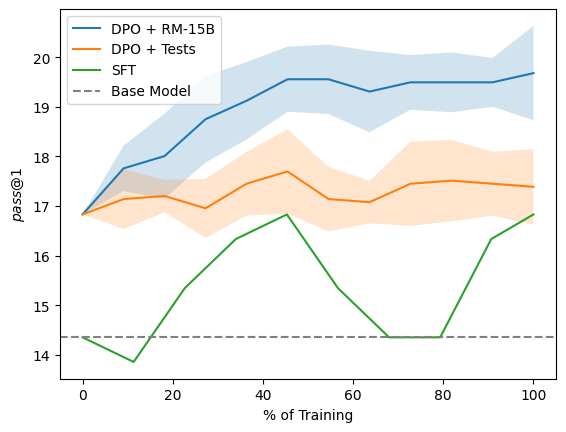

In [9]:
import matplotlib.pyplot as plt
import numpy as np

max_x_values = {key: max([x[0] for x in value]) for key, value in all_pass1s_accs.items()}

fig, ax = plt.subplots()

for key, value in all_pass1s_accs.items():
    x_values = [(x[0] / max_x_values[key]) * 100 for x in value]
    y_values = [y[1] for y in value]
    std_values = [y[2] for y in value]
    
    ax.plot(x_values, y_values, label=key)
    ax.fill_between(x_values, 
                    np.array(y_values) - np.array(std_values), 
                    np.array(y_values) + np.array(std_values), 
                    alpha=0.2)

ax.axhline(y=base_pass1, color='gray', linestyle='--', label=base_label)

ax.set_xlabel('% of Training')
ax.set_ylabel('$pass@1$')
#ax.set_title('t')
ax.legend()

plt.show()

# Generator Models with Different RM Sizes

In [1]:
from pathlib import Path
path_to_grid_results = "../../../results/rm_grid/"
rm_labels = {
    "sc2-3b-v0": "3B",
    "sc2-7b-v0": "7B",
    "sc2-15b-v0": "15B",
    "llama3-70b-v0": "70B",
}
gen_labels = {
  "sc2_3b": "3B",
  "sc2_7b": "7B",
  "sc2_15b": "15B",
  "llama3_70b": "70B",
}
greedy_results = {
  "sc2_3b": "../../../results/greedy_generator/lcb_generator_sc2_3b_greedy.json.gz",
  "sc2_7b": "../../../results/greedy_generator/lcb_generator_sc2_7b_greedy.json.gz",
  "sc2_15b": "../../../results/greedy_generator/lcb_generator_sc2_15b_greedy.json.gz",
  "llama3_70b": "../../../results/greedy_generator/lcb_generator_llama3_70b_greedy.json.gz",
}
assert Path(path_to_grid_results).exists(), f"Path {path_to_grid_results} doesn't exist!"
for k, v in greedy_results.items():
    assert Path(v).exists(), f"Path {v} (in greedy) doesn't exist!"

In [2]:
from coderm.eval.metrics import get_orm_acc, get_pass_ks
from coderm.utils import gunzip_json_read
import numpy as np
from tqdm import tqdm

grid_accs = {}
for r in tqdm(list(Path(path_to_grid_results).iterdir())):
    items = gunzip_json_read(r)["items"]
    name = r.stem
    namesplit = name.split("_")
    gen_name = namesplit[2] + "_" + namesplit[3]
    gen_label = gen_labels[gen_name]
    rm_name = namesplit[-1].split(".json")[0]
    rm_label = rm_labels[rm_name]
    if gen_label == "70B" and rm_label == "70B":
        prod = "normalized"
    else:
        prod = None
    res = get_orm_acc(items, n=75, k=1, prod=prod)
    acc = np.mean(res[0]) * 100
    std = np.mean(res[2]) * 100
    grid_accs[(gen_label, rm_label)] = (acc, std)

# add greedy results
for gen_name, greedy_path in greedy_results.items():
    gen_label = gen_labels[gen_name]
    items = gunzip_json_read(greedy_path)["items"]
    acc = np.mean(get_pass_ks(items, k=1)) * 100
    grid_accs[(gen_label, "Greedy")] = (acc, 0)
grid_accs

100%|██████████| 16/16 [00:05<00:00,  2.94it/s]


{('15B', '3B'): (23.019801980198018, 0.9732961096064018),
 ('70B', '15B'): (28.636709824828642, 1.0784312458877594),
 ('15B', '15B'): (25.171363290175176, 1.3003329077657184),
 ('15B', '70B'): (28.598629093678596, 0.7174959513106149),
 ('70B', '3B'): (26.06626047220107, 0.9204594032956459),
 ('70B', '70B'): (29.645849200304646, 0.9345309361620739),
 ('3B', '70B'): (19.51637471439452, 0.6609503030354071),
 ('7B', '70B'): (24.80959634424981, 1.0304690881747764),
 ('7B', '15B'): (18.84996191926885, 0.9701248440865959),
 ('3B', '15B'): (17.517136329017514, 0.9812717994459345),
 ('3B', '3B'): (12.776085300837778, 0.8125128824581825),
 ('7B', '7B'): (16.812642802741813, 0.6510023228209728),
 ('7B', '3B'): (16.907844630616907, 0.9580918221941447),
 ('3B', '7B'): (13.042650418888044, 0.699328548065764),
 ('70B', '7B'): (26.06626047220107, 0.9605482296747486),
 ('15B', '7B'): (22.105864432597105, 0.811620010889076),
 ('3B', 'Greedy'): (7.920792079207921, 0),
 ('7B', 'Greedy'): (12.3762376237623

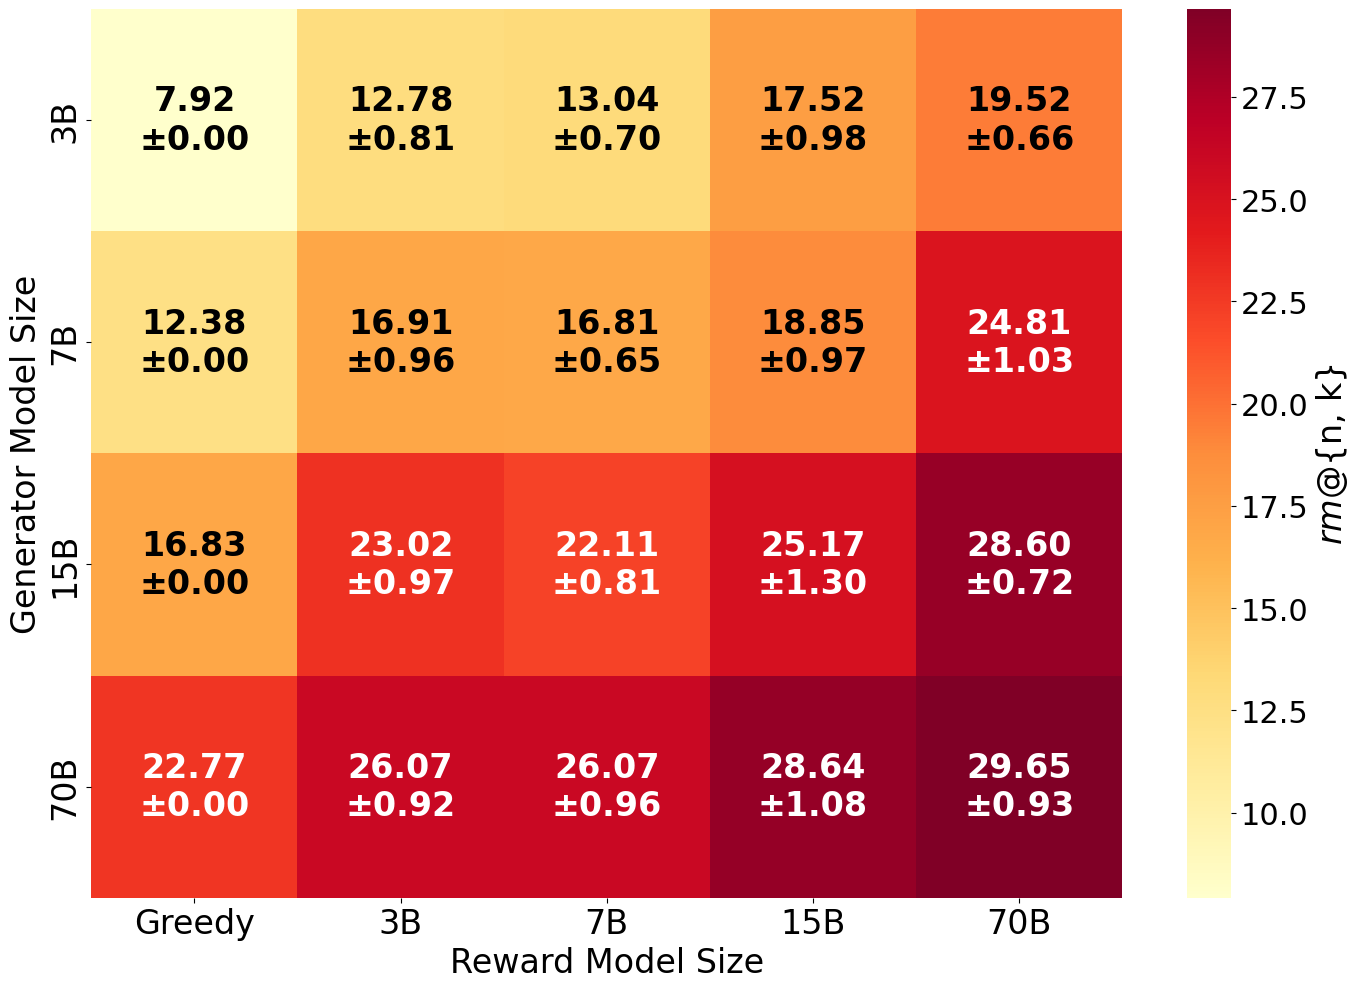

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = []
for (gen, rm), (acc, std) in grid_accs.items():
    data.append({'Generator': gen, 'Reward': rm, 'Accuracy': acc, 'Std': std})
df = pd.DataFrame(data)

model_order = ['3B', '7B', '15B', '70B']
ranker_order = ['Greedy', '3B', '7B', '15B', '70B']

pivot_df = df.pivot(index='Generator', columns='Reward', values='Accuracy')
pivot_df = pivot_df.reindex(index=model_order, columns=ranker_order)

std_df = df.pivot(index='Generator', columns='Reward', values='Std')
std_df = std_df.reindex(index=model_order, columns=ranker_order)

fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(pivot_df, annot=False, cmap='YlOrRd', cbar_kws={'label': '$rm@{n, k}$'}, ax=ax)

def get_text_color(value):
    return 'white' if value > 20 else 'black'

for i in range(len(pivot_df.index)):
    for j in range(len(pivot_df.columns)):
        value = pivot_df.iloc[i, j]
        text_color = get_text_color(value)
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}\n±{std_df.iloc[i, j]:.2f}', 
                ha='center', va='center', color=text_color, fontsize=24, fontweight='bold')

plt.xlabel('Reward Model Size', fontsize=24)
plt.ylabel('Generator Model Size', fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)
cbar.ax.set_ylabel('$rm@${n, k}', fontsize=24)

plt.tight_layout()
plt.savefig("../../dataset/plots/rm_grid.pdf", bbox_inches='tight')
plt.show()